In [1]:
import torch 
import torch.nn as nn 
from pprint import pprint
from src.device import select_device 
from src.testtrain import * 
from src.data import fetch_dataset, dataloader
from src.models.mlp import MLP 
from src.models.linear import Linear
from src.regularizers import * 
from src.metrics import * 
import matplotlib.pyplot as plt 
import math, copy, time

device = select_device()

training_data, test_data = fetch_dataset("MNIST", verbose=False)

train_dataloader, test_dataloader = dataloader(
    training_data, test_data, 
    batch_size=-1
)

In [2]:
epochs = 30

# Unregularized
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 0., 0., 0.
train_losses1, test_losses1 = [], []
test_accuracy1, PQIs1, l0_1 = [], [], []

for t in range(epochs): 
    now = time.time() 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses1.append(train_dict["loss"])
    test_losses1.append(test_dict["loss"])
    test_accuracy1.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs1.append(1 - pqi_)
    l0_1.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    
    print(f"------ Time Taken : {time.time() - now} --------")

Epoch 0
-------------------------------
loss: 2.551288  [60000/60000]
Test Error: 
 Accuracy: 5.2%, Avg loss: 2.545088 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.1367872953414917'
------ Time Taken : 12.287939548492432 --------
Epoch 1
-------------------------------
loss: 2.551288  [60000/60000]
Test Error: 
 Accuracy: 5.5%, Avg loss: 2.529773 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.13679856061935425'
------ Time Taken : 11.411856889724731 --------
Epoch 2
-------------------------------
loss: 2.536373  [60000/60000]
Test Error: 
 Accuracy: 6.0%, Avg loss: 2.501071 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.13681751489639282'
------ Time Taken : 11.185079097747803 --------
Epoch 3
-------------------------------
loss: 2.508411  [60000/60000]
Test Error: 
 Accuracy: 6.6%, Avg loss: 2.461018 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.1368577480316162'
------ Time Taken : 11.352511167526245 --------
Epoch 4
-------------------------------
loss: 2.469370  [60000/60000]
Test Error: 
 Accuracy: 7.8%

KeyboardInterrupt: 

In [8]:
epochs = 30

# Unregularized
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 0., 0., 0.
train_losses1, test_losses1 = [], []
test_accuracy1, PQIs1, l0_1 = [], [], []

for t in range(epochs): 
    now = time.time() 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses1.append(train_dict["loss"])
    test_losses1.append(test_dict["loss"])
    test_accuracy1.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs1.append(1 - pqi_)
    l0_1.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    
    print(f"------ Time Taken : {time.time() - now} --------")
    
# L1 with Soft Thresholding
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 1e-2, 0., 0.
train_losses2, test_losses2 = [], []
test_accuracy2, PQIs2, l0_2 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t, soft_thresh = True)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses2.append(train_dict["loss"])
    test_losses2.append(test_dict["loss"])
    test_accuracy2.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs2.append(1 - pqi_)
    l0_2.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")

# L1 with Proximal LBFGS Optimizer
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 1e-2, 0., 0.
train_losses3, test_losses3 = [], []
test_accuracy3, PQIs3, l0_3 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t, soft_thresh = False)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses3.append(train_dict["loss"])
    test_losses3.append(test_dict["loss"])
    test_accuracy3.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs3.append(1 - pqi_)
    l0_3.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    
# PQI = 0.1 with LBFGS Proximal Optimizer
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 0., 0., 1e-1
train_losses4, test_losses4 = [], []
test_accuracy4, PQIs4, l0_4 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    train_losses4.append(train_dict["loss"])
    test_losses4.append(test_dict["loss"])
    test_accuracy4.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs4.append(1 - pqi_)
    l0_4.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    
# PQI = 1.0 with LBFGS Proximal Optimizer
torch.manual_seed(0)
model = Linear(data_shape = (28, 28, ), target_size = 10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

l1, l2, pqi = 0., 0., 1e0
train_losses5, test_losses5 = [], []
test_accuracy5, PQIs5, l0_5 = [], [], []

for t in range(epochs): 
    print(f"Epoch {t}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi, t=t)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses5.append(train_dict["loss"])
    test_losses5.append(test_dict["loss"])
    test_accuracy5.append(test_dict["accuracy"])
    pqi_ = PQI(model, device, 1, 2).item()
    PQIs5.append(1 - pqi_)
    l0_5.append(L0_sparsity(model))
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {1 - pqi_}")
    

Epoch 0
-------------------------------
loss: 2.551288  [60000/60000]
Test Error: 
 Accuracy: 5.2%, Avg loss: 2.545088 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.1367872953414917'
Epoch 1
-------------------------------
loss: 2.551288  [60000/60000]
Test Error: 
 Accuracy: 5.5%, Avg loss: 2.529773 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.13679856061935425'
Epoch 2
-------------------------------
loss: 2.536373  [60000/60000]
Test Error: 
 Accuracy: 6.0%, Avg loss: 2.501071 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.13681751489639282'
Epoch 3
-------------------------------
loss: 2.508411  [60000/60000]
Test Error: 
 Accuracy: 6.6%, Avg loss: 2.461018 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.1368577480316162'
Epoch 4
-------------------------------
loss: 2.469370  [60000/60000]
Test Error: 
 Accuracy: 7.8%, Avg loss: 2.411654 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.13693362474441528'
Epoch 5
-------------------------------
loss: 2.421222  [60000/60000]
Test Error: 
 Accuracy: 9.4%, Avg loss: 2.

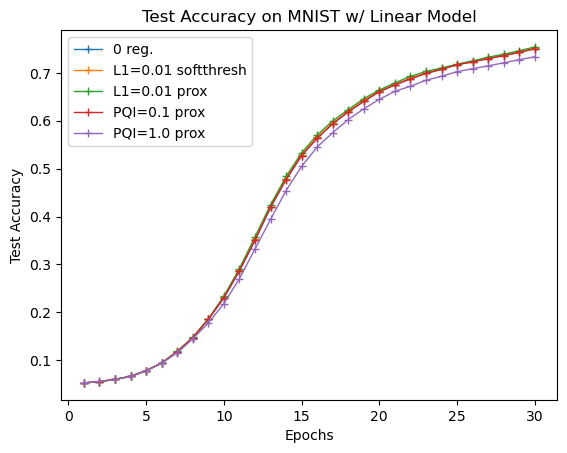

In [12]:
plt.plot(range(1, epochs+1), test_accuracy1, marker="+", label="0 reg.", linewidth=1)
plt.plot(range(1, epochs+1), test_accuracy2, marker="+", label="L1=0.01 softthresh", linewidth=1)
plt.plot(range(1, epochs+1), test_accuracy3, marker="+", label="L1=0.01 prox", linewidth=1)
plt.plot(range(1, epochs+1), test_accuracy4, marker="+", label="PQI=0.1 prox", linewidth=1)
plt.plot(range(1, epochs+1), test_accuracy5, marker="+", label="PQI=1.0 prox", linewidth=1)
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy on MNIST w/ Linear Model")
plt.legend()
plt.show() 

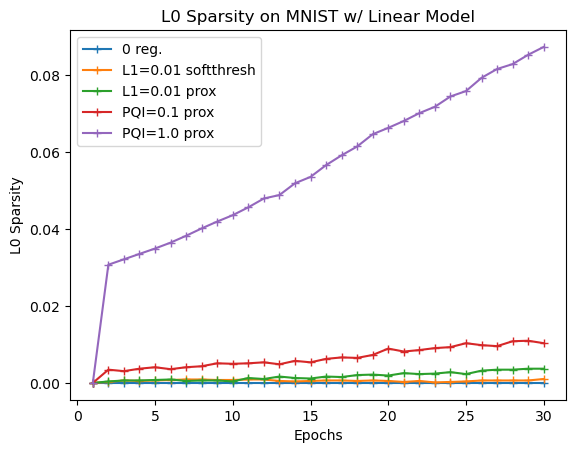

In [10]:
plt.plot(range(1, epochs+1), l0_1, marker="+", label="0 reg.")
plt.plot(range(1, epochs+1), l0_2, marker="+", label="L1=0.01 softthresh")
plt.plot(range(1, epochs+1), l0_3, marker="+", label="L1=0.01 prox")
plt.plot(range(1, epochs+1), l0_4, marker="+", label="PQI=0.1 prox")
plt.plot(range(1, epochs+1), l0_5, marker="+", label="PQI=1.0 prox")
plt.xlabel("Epochs")
plt.ylabel("L0 Sparsity")
plt.title("L0 Sparsity on MNIST w/ Linear Model")
plt.legend()
plt.show() 

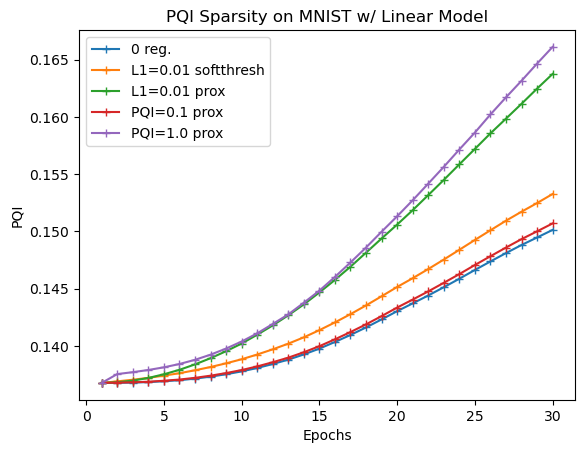

In [11]:
plt.plot(range(1, epochs+1), PQIs1, marker="+", label="0 reg.")
plt.plot(range(1, epochs+1), PQIs2, marker="+", label="L1=0.01 softthresh")
plt.plot(range(1, epochs+1), PQIs3, marker="+", label="L1=0.01 prox")
plt.plot(range(1, epochs+1), PQIs4, marker="+", label="PQI=0.1 prox")
plt.plot(range(1, epochs+1), PQIs5, marker="+", label="PQI=1.0 prox")
plt.xlabel("Epochs")
plt.ylabel("PQI")
plt.title("PQI Sparsity on MNIST w/ Linear Model")
plt.legend()
plt.show() 